In [167]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [168]:
data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
data.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [169]:
data.dtypes
#Check the Features(columns)types (int, float , obj or bool)

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [170]:
data.drop(['Unnamed: 0','Clothing ID'], axis=1, inplace=True)
#Dropout Unwanted Features (Would not make sense at all )

In [171]:
data.rename(columns={'Review Text': 'text',
                    'Positive Feedback Count': 'feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended'},inplace=True)

In [172]:
print(data.columns)
#New Cloumns Names

Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')


In [173]:
data.isnull().sum()
#Look into the missing vlaues

Age                  0
Title             3810
text               845
Rating               0
Recommended          0
feedback_count       0
Division            14
Department          14
Class               14
dtype: int64

In [174]:
data.dropna(axis=0, inplace=True)
#Removing out every row in the DF which contains missing data

In [175]:
data.isnull().sum()
#Confirm that we do not have missing values anymore

Age               0
Title             0
text              0
Rating            0
Recommended       0
feedback_count    0
Division          0
Department        0
Class             0
dtype: int64

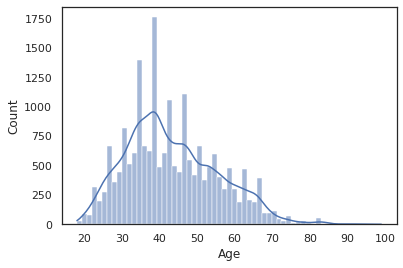

In [176]:
sns.histplot(data=data, x='Age', kde=True)
plt.show()
#This histgram below represent that the 38 Yrs Old females are the main customers of the Site

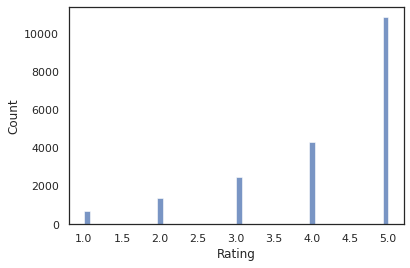

In [177]:
sns.histplot(data=data, x='Rating', kde=False)
#The majority of site visitors are more likely to give 5 rates for each product

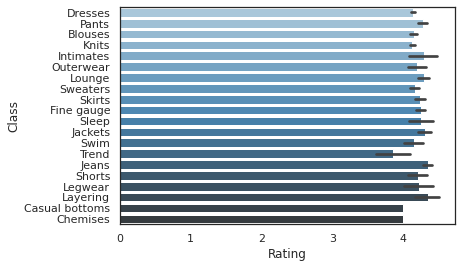

In [178]:
sns.set_style('white')
sns.barplot(x=data['Rating'], y=data['Class'],palette="Blues_d")
#Layering class on the top of whole ratings comparing to other classes!

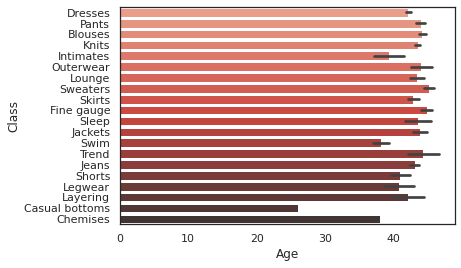

In [179]:
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=False)
sns.barplot(x=data['Age'], y=data['Class'],palette="Reds_d")
#Sweaters are more preferable for those whom are above 40's where Casual bottoms attrcats 20's as this barplot shows below!

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


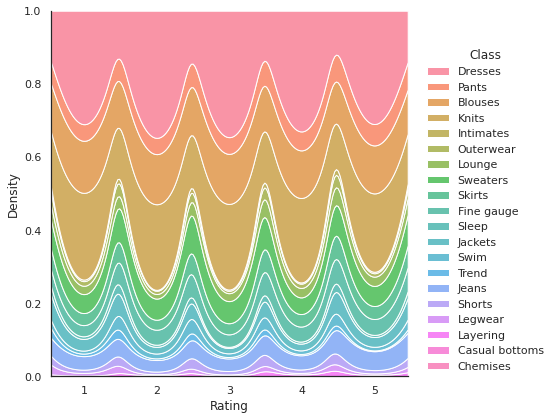

In [180]:
sns.displot(data=data,
           x='Rating', hue="Class",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
)
#Plot shows the ditribution of positive ratings

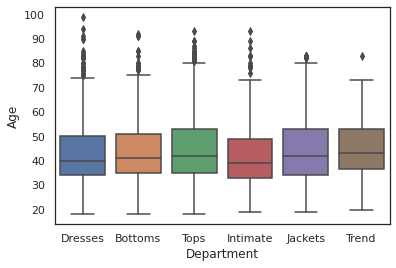

In [181]:
sns.boxplot(x=data['Department'], y=data['Age'])
plt.show()
#This boxplot below determine the mean age according to each department

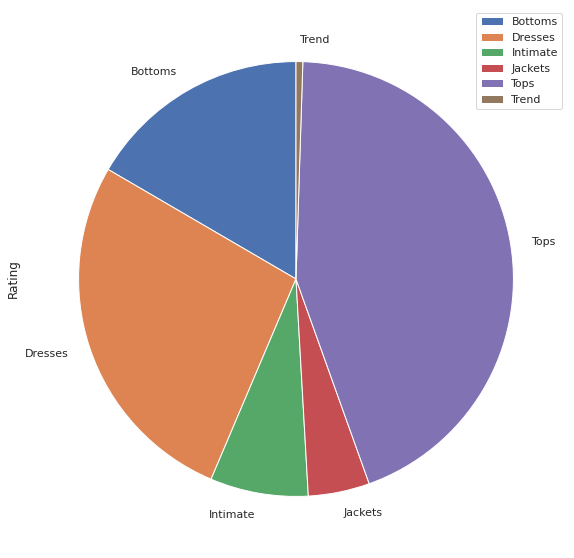

In [182]:
data.groupby(['Department']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(15,10), y='Rating')
#Piechart visualize that the Tops department has gotten the most amounts of ratings, where Trends got the low amount of ratings

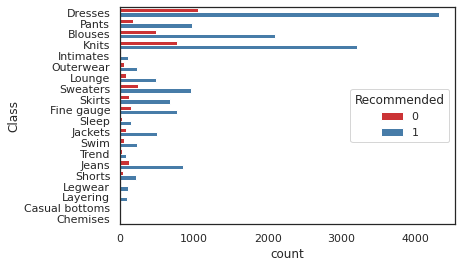

In [183]:
sns.countplot(data=data, y='Class', hue='Recommended',  palette = "Set1")
#Recommended or not

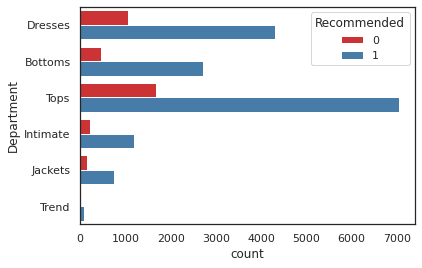

In [184]:
sns.countplot(data=data, y='Department', hue='Recommended' ,palette = "Set1")
#Recommended or not

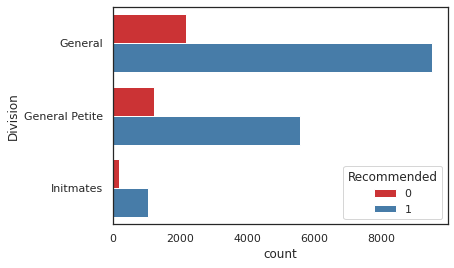

In [185]:
sns.countplot(data=data, y='Division', hue='Recommended', palette = "Set1")
#Recommended or not

#creating word cloud

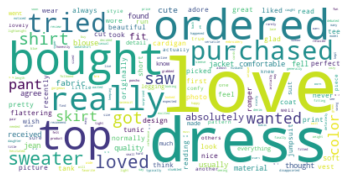

In [186]:
from wordcloud import WordCloud
text = " ".join(cat.split()[1] for cat in data.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [187]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [188]:
data.columns


Index(['Age', 'Title', 'text', 'Rating', 'Recommended', 'feedback_count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [189]:
data['all_text'] = data['text']


#Step 1: Tokenization
Our first step is tokenization. This important task takes your long string of text and converts each word into a “token” or value and places them within a list. The list values are much easier to manipulate by later steps. We’ll create a reusable function to handle this for us.

In [190]:
nltk.download('punkt');


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [191]:
def tokenize(column):
    # Tokenize a Pandas dataframe columns and returns a list of tokens.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha]

In [192]:
data['tokenized'] = data.apply(lambda x: tokenize(x['all_text']), axis=1)
data[['text', 'tokenized']].head()
#we use the apply() function with lambda to pass in the column containing our string of text, which is called all_text

,text,tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, but, this,..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


##Step2: Removing Stopwords
In the next step, we’re going to reduce the noise in our data by removing “stopwords”. These are special language-specific words that appear within a sentence that add little value to the meaning. Removing them helps the model see the words that matter. First, download the stopwords using the below command.


In [193]:
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [194]:
def remove_stopwords(tokenized_column):
    # this fuction will retun a list of tokens with English stopwords removed
    stops = set(stopwords.words('english'))
    return [word for word in tokenized_column if not word in stops]

In [195]:
data['stopwords_removed'] = data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data[['text', 'stopwords_removed']].head()

,text,stopwords_removed
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, one, petit..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."


##Step3: Stemming
The other useful text preprocessing technique we can apply is called “stemming”. This basically reduces each word down to its root, so “processing”, “processor”, and “process”, all become “process”. This is another way to remove noise and reduce the number of unique words in the text to help the model.

In [196]:
def apply_stemming(tokenized_column):
    # this function will return a list of tokens with PorterStemming applied
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [197]:
data['porter_stemmed'] = data.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
data[['text', 'porter_stemmed']].head()

,text,porter_stemmed
2,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, ., ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[thi, shirt, flatter, due, adjust, front, tie,..."
5,"I love tracy reese dresses, but this one is no...","[i, love, traci, rees, dress, ,, one, petit, ...."
6,I aded this in my basket at hte last mintue to...,"[i, ade, basket, hte, last, mintu, see, would,..."


##Step4: Rejoin words
The final step is to take our last list of tokens and rejoin them back into a string so we can pass it to a vectorizer. This is dead easy. We just pass the tokenized_column (which will be porter_stemmed for us) and use join() to join the words into a string, placing a space between each word.

In [198]:
def rejoin_words(tokenized_column):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))

In [199]:
data['rejoined'] = data.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
data[['text', 'rejoined']].head()

,text,rejoined
2,I had such high hopes for this dress and reall...,i high hope dress realli want work . initi ord...
3,"I love, love, love this jumpsuit. it's fun, fl...","i love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,thi shirt flatter due adjust front tie . perfe...
5,"I love tracy reese dresses, but this one is no...","i love traci rees dress , one petit . 5 feet t..."
6,I aded this in my basket at hte last mintue to...,i ade basket hte last mintu see would look lik...


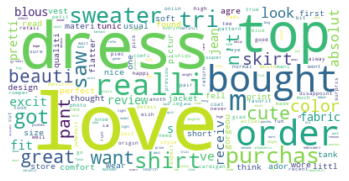

In [200]:
text = " ".join(cat.split()[1] for cat in data.rejoined)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [201]:
from sklearn.model_selection import train_test_split
# spliting the data into trainng and testing data:- 
X_train, X_test, y_train, y_test = train_test_split(data['rejoined'],data['Recommended'], test_size=0.4,random_state=0)

In [202]:
print('X_train first entry :\n\n', X_train.iloc[1])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry :

 these great pant , green holli color


X_train shape:  (11797,)


In [203]:

from sklearn.feature_extraction.text import CountVectorizer
# fit the countVectorizer to the training data:-
vect = CountVectorizer().fit(X_train)

In [204]:
vect.get_feature_names()[::1000]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 'betw',
 'current',
 'forehead',
 'lac',
 'ordinar',
 'rubber',
 'sweetest',
 'wonderful']

In [205]:
len(vect.get_feature_names())


8150

In [206]:
# Transform the document in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<11797x8150 sparse matrix of type '<class 'numpy.int64'>'
	with 320314 stored elements in Compressed Sparse Row format>

##Create Support vector machine classifier(linear kernal)

In [207]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
# train the classifier: 
clf.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

##Evaluate the model

In [208]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
# predict the transformed test documents: =
predictions = clf.predict(vect.transform(X_test))
print(classification_report(y_test, predictions))
print('Accuracy score: ', round(accuracy_score(y_test, predictions)))
print('F1_score: ', round(f1_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1454
           1       0.91      0.92      0.91      6411

    accuracy                           0.86      7865
   macro avg       0.77      0.75      0.76      7865
weighted avg       0.86      0.86      0.86      7865

Accuracy score:  1
F1_score:  1


##Tfidf - term frequency-inverse document frequency
reflect how important a word is to a document 


In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
#min_df: ignore terms that have a document frequency strictly lower than the given threshold
len(vect.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2876

In [210]:
X_train_vectorized = vect.transform(X_train)
model = svm.SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('accuracy :', accuracy_score(y_test, predictions))

accuracy : 0.8851875397329942
